<a href="http://datamics.com/de/courses/"><img src=../DATA/bg_datamics_top.png></a><em text-align:center>© Datamics</em>

# Tensorflow Projekt - Lösung

Wir werden nun mit unserem Tensorflow Projekt den Deep Learning Abschnitt abschließen. Dazu schauen wir uns die Effizienz von Deep Neural Nets an!

Wir werden einen [Bank Authentifizierungs Datensatz](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) aus dem USI Repository verwenden.

Der Datensatz beinhaltet 5 Spalten:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Hier gibt "class" an, ob eine Banknote authentifiziert wurde oder nicht. 

Diese Art von Aufgabe ist perfekt für Neuronale Netze und Deep Learning! Folge den Anweisungen und löse die Aufgaben. Viel Spaß!

## Die Daten Laden

**Nutze Pandas, um die `bank_note_data.csv` Datei aus diesem verzeichnis zu öffnen.**

In [3]:
import pandas as pd
import tensorflow as tf

In [4]:
import requests
import io

In [5]:
r = requests.get("https://github.com/Soley02/DeepLearning/blob/main/Bank_Note_Data.csv")

In [6]:
data = pd.read_csv('Bank_Note_Data.csv')

**Schaue dir den head des DataFrames an.**

In [7]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Explorative Daten Analyse

Wir erzeugen einige Visualisierungen für einen allgemeinen Überblick:

**Importiere Seaborn und setzte matplotlib inline.**

In [8]:
import seaborn as sns
%matplotlib inline

**Erstelle ein `countplot` für die "Classes".**

<AxesSubplot:xlabel='Class', ylabel='count'>

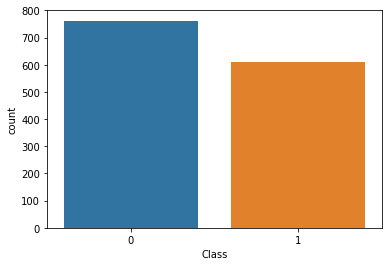

In [9]:
sns.countplot(x='Class',data=data)

**Erstelle ein `pairplot` und setze die `hue` zu Class.**

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

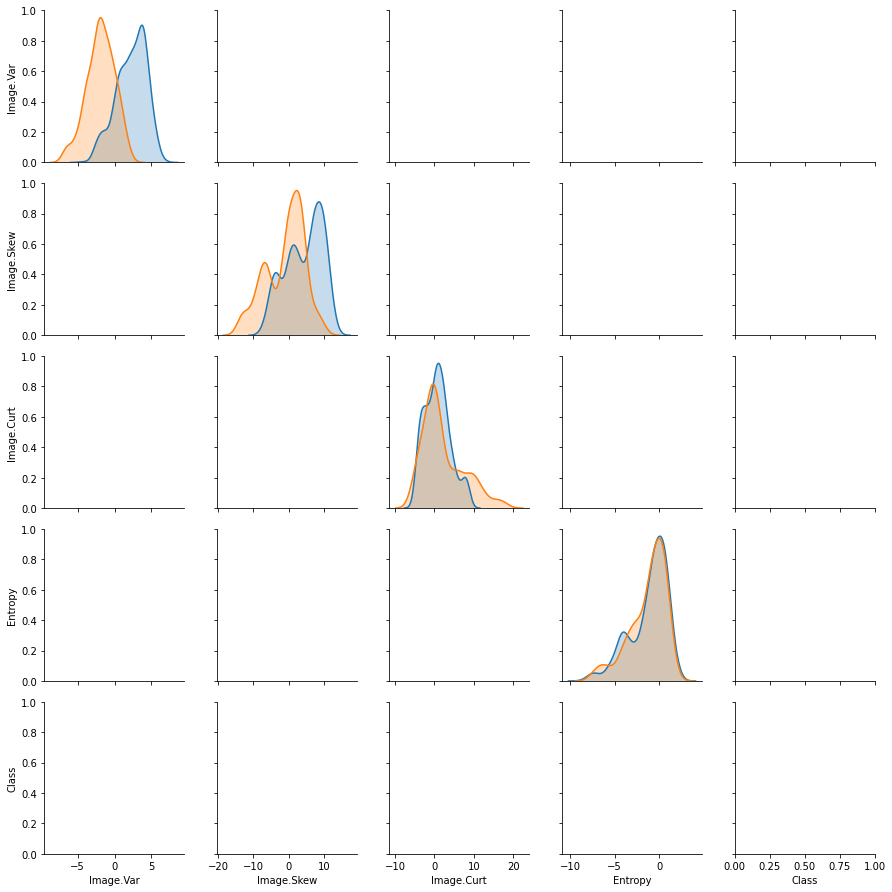

In [10]:
sns.pairplot(data,hue='Class')

## Daten Vorbereitung

Wenn wir Neuronale Netze und Deep Learning basierte Systeme nutzen, dann empfiehlt es sich üblicherweise die Daten zu Standardisieren. Dieser Schritt ist für unseren konkreten Datensatz nicht nötig, wir möchten aber doch einmal gemeinsam durchgehen.

### Standard Scaling

**Importiere `StandardScaler` aus `sklearn.preprocessing`.**

In [ ]:
from sklearn.preprocessing import StandardScaler

**Erstelle ein StandardScaler() Objekt namens "scaler".**

In [ ]:
scaler = StandardScaler()

**Fitte scaler auf die Features.**

In [ ]:
scaler.fit(data.drop('Class',axis=1))

**Nutze die `transform()` Methode, um die Features in eine skalierte Version umzuwandeln.**

In [ ]:
scaled_features = scaler.fit_transform(data.drop('Class',axis=1))

**Konvertiere die skalierten Features in einen DataFrame und sieh dir dessen Head an.**

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

## Train Test Split

**Erstelle zwei Objekte X und y, die die skalierten Feature-Werte und Labels beinhalten.**

In [ ]:
X = df_feat

In [ ]:
y = data['Class']

**Nutze die `to_numpy()` Methode auf X und y und überschreibe sie mit dem neuen Ergebnis.**

*Wir müssen dies tun, da Tensorflow mit Numpy Arrays arbeitet anstatt mit Pandas Series.**

In [ ]:
X = X.to_numpy()
y = y.to_numpy()

**Nutze SciKit Learn, um Trainings- und Testsets zu erzeugen.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Contrib.learn

**Erstelle ein Objekt namens "Classifier", das ein `DNNClassifier` aus learn ist. Setze `classes` auf 2  und `hidden_units` auf [10,20,10].** 

In [ ]:
classifier = tf.contrib.learn.DNNClassifier(
  feature_columns=feature_columns, hidden_units=[10, 20, 10], n_classes=2)

**Jetzt fitte den classfier auf das Trainingsset. Nutze `steps=200` und `batch_size=20`.**

In [ ]:
classifier.fit(x_train, y_train, steps=200, batch_size=20)

## Modell Auswertung

**Nutze die `predict` Methode, um Vorhersagen für X_test zu erstellen.**

In [ ]:
note_predictions = list(classifier.predict(x_test, as_iterable=True))

**Jetzt erstelle Callsification Report und Confusion Matrix.**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,note_predictions))

In [ ]:
print(classification_report(y_test,note_predictions))

## Optionaler Vergleich

Dir sollten extrem akkurae Ergebnisse beim DNN Modell auffallen. Vergleichen wir das mit einem Random Forest Classifier für eine Einordnung der Ergebnisse.

**Nutze SciKit Learn, um einen Random Forest Classifier zu erstellen. Vergleiche anschließend Classification Report und Confusion Matrix.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
rfc_preds = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_preds))

In [ ]:
print(confusion_matrix(y_test,rfc_preds))

Es sollte auch ziemlich gut, aber nicht genauso gut wie das DNN Modell abgeschnitten haben. Das hat dir hoffentlich die Power der DNNs gezeigt.

# Gut gemacht!